# 1.4.12 Template Matching

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [4]:
img = cv2.imread('mario.png',0)
img2 = img.copy()
template = cv2.imread('mario_coin.png',0)
w, h = template.shape[::-1]
# All the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

AttributeError: 'NoneType' object has no attribute 'copy'

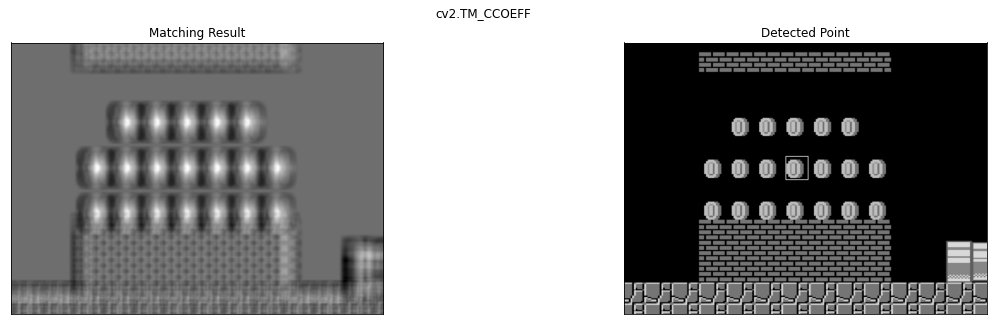

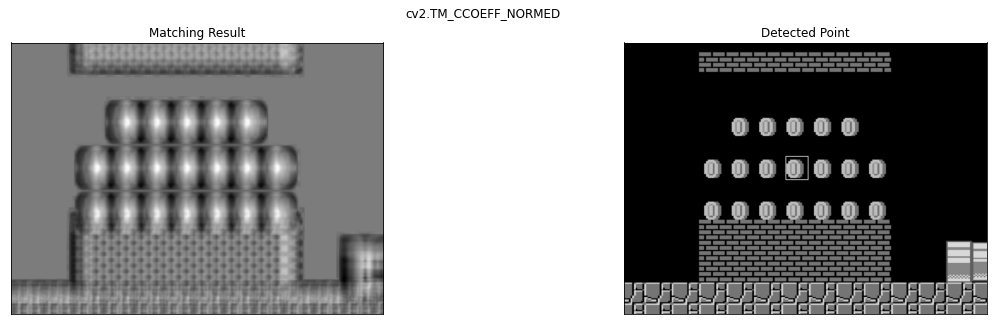

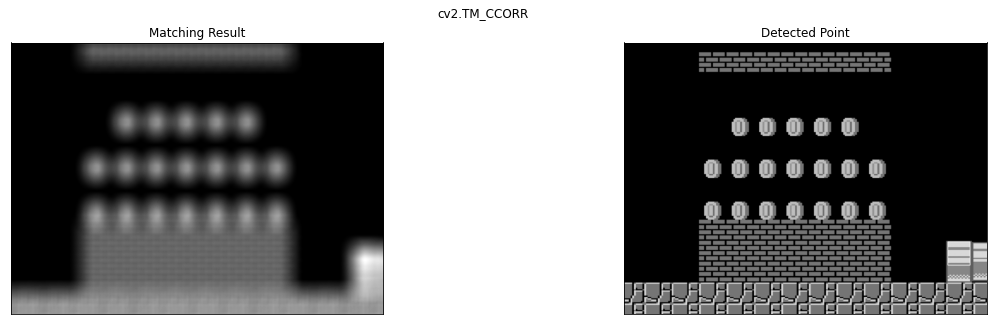

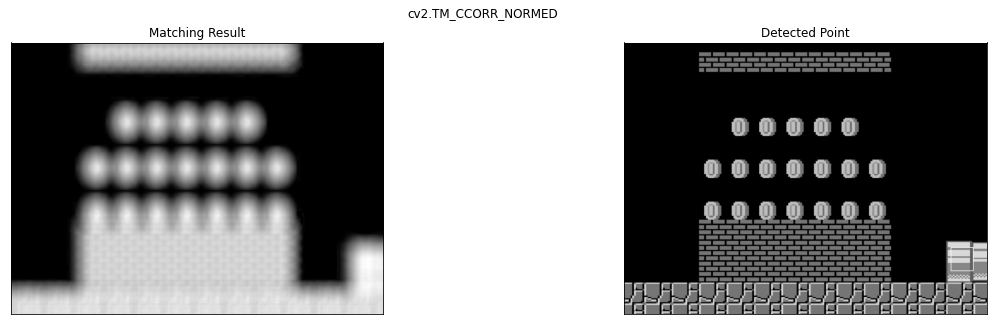

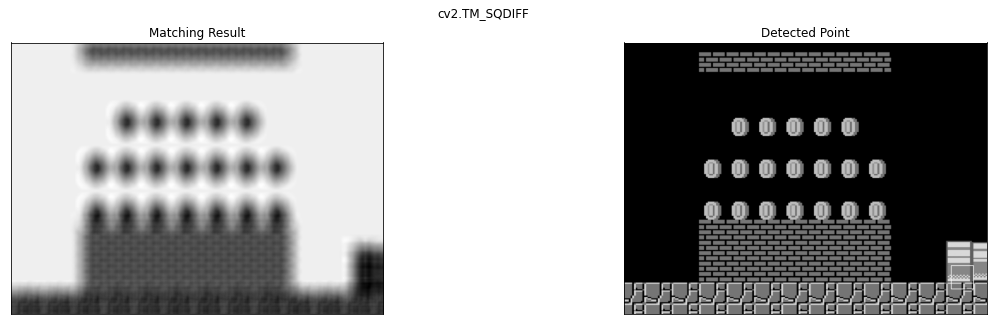

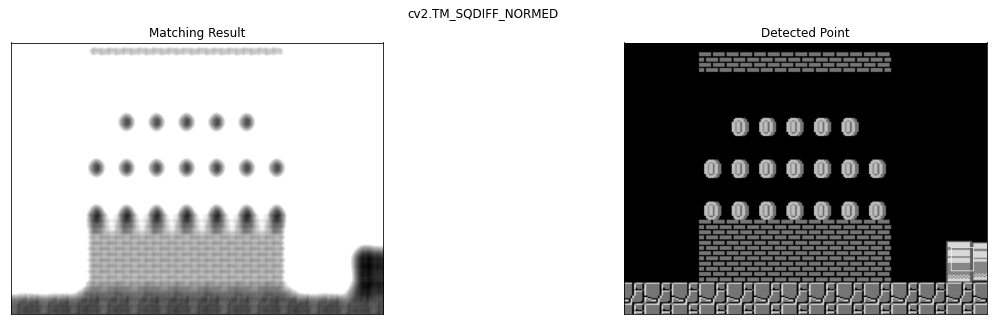

In [14]:
for meth in methods:
    img = img2.copy()
    method = eval(meth)
    # Apply template Matching
    res = cv2.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv2.rectangle(img,top_left, bottom_right, 255, 2)
    plt.figure(figsize=(20,5))
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()

In [2]:
img_rgb = cv2.imread('mario.jpg')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
cv2.imshow('img',img_gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [3]:
template = cv2.imread('mario_coin.jpg',0)
cv2.imshow('img',template)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [4]:
w, h = template.shape[::-1]
print(w,h)

79 70


In [5]:
res = cv2.matchTemplate(img_gray, template, cv2.TM_CCOEFF_NORMED)
print(res)
cv2.imshow('img',res)
cv2.waitKey(0)
cv2.destroyAllWindows()

[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 ...
 [-0.00296403 -0.01428647 -0.0231669  ...  0.09820565  0.11409239
   0.1300499 ]
 [ 0.00157583 -0.00906474 -0.01707646 ...  0.09256944  0.1081357
   0.12367731]
 [ 0.00533295 -0.00465471 -0.01191124 ...  0.08864216  0.10369574
   0.11864495]]


In [6]:
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
print(min_val, max_val, min_loc, max_loc)

-0.5856967568397522 0.7031609416007996 (775, 721) (1070, 697)


In [7]:
res=(res-min_val)/(max_val-min_val)
print(res)

[[0.4544309  0.4544309  0.4544309  ... 0.4544309  0.4544309  0.4544309 ]
 [0.4544309  0.4544309  0.4544309  ... 0.4544309  0.4544309  0.4544309 ]
 [0.4544309  0.4544309  0.4544309  ... 0.4544309  0.4544309  0.4544309 ]
 ...
 [0.45213118 0.4433463  0.43645614 ... 0.5306268  0.542953   0.5553341 ]
 [0.45565355 0.44739774 0.44118157 ... 0.5262537  0.53833133 0.55038977]
 [0.45856863 0.4508194  0.4451892  ... 0.52320665 0.5348864  0.54648525]]


In [8]:
threshold = 0.8
loc = np.where(res >= threshold)

In [9]:
print(loc[::-1])

(array([1109, 1107, 1108, ..., 1289, 1290, 1291], dtype=int64), array([  27,   28,   28, ..., 1054, 1054, 1054], dtype=int64))


In [10]:
img_rgb = cv2.imread('mario.jpg') #mario hmson2
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (255,0,255), 1)

In [11]:
cv2.imshow('dst',img_rgb)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [12]:
def nothing(x):
    pass

In [13]:
cv2.namedWindow('image')
cv2.createTrackbar('threshold', 'image', 200, 255,nothing)
while(1):
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
    threshold = cv2.getTrackbarPos('threshold', 'image')
    loc = np.where(res >= threshold/255.)
    img_rgb = cv2.imread('mario.jpg')
    for pt in zip(*loc[::-1]):
        cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (255,0,255), 1)
    cv2.imshow('image',img_rgb)
cv2.destroyAllWindows()